In [8]:
import pandas as pd

df = pd.read_csv('광주맛집.csv')
df

,연번,상호명,소재지도로명주소,전화번호,비고,데이터기준일자
0,1,100족발본점,광주광역시 광산구,062-951-1033,건강맛집,2021-11-30
1,2,강의리추어탕,광주광역시 북구,062-527-0937,건강맛집,2021-11-30
2,3,강촌,광주광역시 서구,062-374-3579,건강맛집,2021-11-30
3,4,관가,광주광역시 동구,062-226-0040,건강맛집,2021-11-30
4,5,광후장어,광주광역시 광산구,062-954-5900,건강맛집,2021-11-30
...,...,...,...,...,...,...
62,63,행랑채,광주광역시 북구,062-575-8228,나들이맛집,2021-11-30
63,64,현완단겸 상추튀김,광주광역시 서구,062-375-3721,대표음식맛집,2021-11-30
64,65,현주네이야기,광주광역시 북구,062-573-9880,대표음식맛집,2021-11-30
65,66,홍춘이,광주광역시 북구,062-521-7733,게미맛집,2021-11-30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연번        67 non-null     int64 
 1   상호명       67 non-null     object
 2   소재지도로명주소  67 non-null     object
 3   전화번호      67 non-null     object
 4   비고        67 non-null     object
 5   데이터기준일자   67 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.3+ KB


In [10]:
df.isna()

,연번,상호명,소재지도로명주소,전화번호,비고,데이터기준일자
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
62,False,False,False,False,False,False
63,False,False,False,False,False,False
64,False,False,False,False,False,False
65,False,False,False,False,False,False


In [11]:
df.isna().sum()

연번          0
상호명         0
소재지도로명주소    0
전화번호        0
비고          0
데이터기준일자     0
dtype: int64

In [12]:
df = df.fillna(0)
df

,연번,상호명,소재지도로명주소,전화번호,비고,데이터기준일자
0,1,100족발본점,광주광역시 광산구,062-951-1033,건강맛집,2021-11-30
1,2,강의리추어탕,광주광역시 북구,062-527-0937,건강맛집,2021-11-30
2,3,강촌,광주광역시 서구,062-374-3579,건강맛집,2021-11-30
3,4,관가,광주광역시 동구,062-226-0040,건강맛집,2021-11-30
4,5,광후장어,광주광역시 광산구,062-954-5900,건강맛집,2021-11-30
...,...,...,...,...,...,...
62,63,행랑채,광주광역시 북구,062-575-8228,나들이맛집,2021-11-30
63,64,현완단겸 상추튀김,광주광역시 서구,062-375-3721,대표음식맛집,2021-11-30
64,65,현주네이야기,광주광역시 북구,062-573-9880,대표음식맛집,2021-11-30
65,66,홍춘이,광주광역시 북구,062-521-7733,게미맛집,2021-11-30


In [13]:
df['소재지도로명주소'].value_counts()

광주광역시 서구     24
광주광역시 북구     17
광주광역시 동구     12
광주광역시 광산구     9
광주광역시 남구      5
Name: 소재지도로명주소, dtype: int64

In [14]:
restaurant = pd.DataFrame(df.소재지도로명주소.value_counts())
restaurant.columns = ['맛집수']
restaurant['비율'] = restaurant['맛집수']/restaurant['맛집수'].sum()*100
restaurant = restaurant.round(2)
restaurant

,맛집수,비율
광주광역시 서구,24,35.82
광주광역시 북구,17,25.37
광주광역시 동구,12,17.91
광주광역시 광산구,9,13.43
광주광역시 남구,5,7.46


In [15]:
restaurant_type = pd.DataFrame(df['비고'].value_counts())
restaurant_type.columns = ['종류']
restaurant_type['비율'] = restaurant_type['종류']/restaurant_type['종류'].sum()*100
restaurant_type = restaurant.round(2)
restaurant_type

,맛집수,비율
광주광역시 서구,24,35.82
광주광역시 북구,17,25.37
광주광역시 동구,12,17.91
광주광역시 광산구,9,13.43
광주광역시 남구,5,7.46


In [16]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

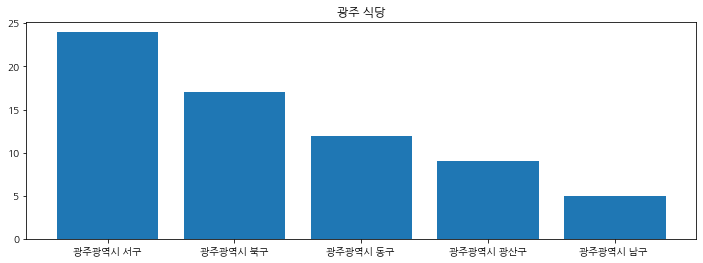

In [17]:
from matplotlib import pyplot as plt

plt.figure(figsize = (12,4))
plt.title('광주 식당')
plt.bar(restaurant.index, restaurant['맛집수'])
plt.show()